1. IMPORTACIÓN DE LIBRERÍAS

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

2. CARGA DE LOS TRES ARCHIVOS

In [16]:
tot = pd.read_csv('Internet Accesos Tecnologias Totales (1).csv',
                  thousands='.',   # el punto es separador de miles
                  decimal=',')     # por si aparece coma decimal en algún lado)
prov = pd.read_csv('Internet Accesos Tecnologias Provincias.csv',
                   thousands='.',   # el punto es separador de miles
                   decimal=',')     # por si aparece coma decimal en algún lado)
loc = pd.read_csv('Internet Accesos Tecnologias Localidades.csv',
                  thousands='.',   # el punto es separador de miles
                  decimal=',')     # por si aparece coma decimal en algún lado)

print(tot.head(), tot.info())
print(prov.head(), prov.info())
print(loc.head(), loc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Año           45 non-null     int64
 1   Trimestre     45 non-null     int64
 2   ADSL          45 non-null     int64
 3   Cablemodem    45 non-null     int64
 4   Fibra Optica  45 non-null     int64
 5   Wireless      45 non-null     int64
 6   Otros         45 non-null     int64
 7   Total         45 non-null     int64
dtypes: int64(8)
memory usage: 2.9 KB
    Año  Trimestre    ADSL  Cablemodem  Fibra Optica  Wireless   Otros  \
0  2025          1  485049     5610147       5031815    589887  374719   
1  2024          4  521297     5625728       4875163    599299  304133   
2  2024          3  721676     5787585       4315339    608325  264037   
3  2024          2  733491     5867504       4169958    593197  191957   
4  2024          1  774475     5986957       4015101    598682  257941   

     

3. CREAR COLUMNA "PERIODO"

In [19]:
# Crear PERIODO solo donde existe Año y Trimestre
for df in [tot, prov]:
    df["Periodo"] = df["Año"].astype(str) + "-T" + df["Trimestre"].astype(str)

# Localidades NO tiene Año ni Trimestre, por eso no se le crea Periodo

print(tot.head())
prov.head()


    Año  Trimestre    ADSL  Cablemodem  Fibra Optica  Wireless   Otros  \
0  2025          1  485049     5610147       5031815    589887  374719   
1  2024          4  521297     5625728       4875163    599299  304133   
2  2024          3  721676     5787585       4315339    608325  264037   
3  2024          2  733491     5867504       4169958    593197  191957   
4  2024          1  774475     5986957       4015101    598682  257941   

      Total  Periodo  
0  12091617  2025-T1  
1  11925620  2024-T4  
2  11696962  2024-T3  
3  11556107  2024-T2  
4  11633156  2024-T1  


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra Optica,Wireless,Otros,Total,Periodo
0,2025,1,Buenos Aires,161339,2721677,2167842,141124,98914,5290896,2025-T1
1,2025,1,CABA,23684,1068665,345148,4353,37086,1478936,2025-T1
2,2025,1,Catamarca,3688,9070,61689,1384,3186,79017,2025-T1
3,2025,1,Chaco,5954,55663,93849,7624,4571,167661,2025-T1
4,2025,1,Chubut,11588,57374,68846,30717,16196,184721,2025-T1


4. REVISIÓN DE CALIDAD DE DATOS

In [27]:
def resumen_calidad(df, nombre):
    print(f"\n====== {nombre} ======")
    print(df.info())
    print("\nValores faltantes:\n", df.isna().sum())
    print("Duplicados:", df.duplicated().sum())

resumen_calidad(tot, "Totales")
resumen_calidad(prov, "Provincias")
resumen_calidad(loc, "Localidades")


====== Totales ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           45 non-null     int64 
 1   Trimestre     45 non-null     int64 
 2   ADSL          45 non-null     int64 
 3   Cablemodem    45 non-null     int64 
 4   Fibra Optica  45 non-null     int64 
 5   Wireless      45 non-null     int64 
 6   Otros         45 non-null     int64 
 7   Total         45 non-null     int64 
 8   Periodo       45 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.3+ KB
None

Valores faltantes:
 Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra Optica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64
Duplicados: 0

====== Provincias ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column    

5. ESTADÍSTICAS DESCRIPTIVAS

In [29]:
print(tot.describe())
print(prov.describe())
print(loc.describe())

               Año  Trimestre          ADSL    Cablemodem  Fibra Optica  \
count    45.000000  45.000000  4.500000e+01  4.500000e+01  4.500000e+01   
mean   2019.133333   2.466667  2.553588e+06  4.516611e+06  1.459099e+06   
std       3.286335   1.140175  1.184218e+06  1.312038e+06  1.555496e+06   
min    2014.000000   1.000000  4.850490e+05  2.407330e+06  1.391870e+05   
25%    2016.000000   1.000000  1.468333e+06  3.210602e+06  1.780700e+05   
50%    2019.000000   2.000000  2.909805e+06  4.800091e+06  8.522210e+05   
75%    2022.000000   3.000000  3.708898e+06  5.826257e+06  2.723285e+06   
max    2025.000000   4.000000  3.803024e+06  6.073426e+06  5.031815e+06   

            Wireless          Otros         Total  
count      45.000000      45.000000  4.500000e+01  
mean   323951.688889  168593.422222  9.021843e+06  
std    209793.019079   89525.389470  1.846091e+06  
min     70749.000000   54300.000000  6.398398e+06  
25%     85452.000000   71573.000000  7.251673e+06  
50%    33824

6. OUTLIERS (IQR)

In [38]:
def detectar_outliers_iqr(df, columna):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 2 * iqr
    lim_sup = q3 + 2 * iqr

    outliers = df[(df[columna] < lim_inf) | (df[columna] > lim_sup)]
    return outliers, lim_inf, lim_sup


In [39]:
print("===== OUTLIERS: TOTALES =====")

cols_tot = ["ADSL","Cablemodem","Fibra Optica","Wireless","Otros","Total"]

for col in cols_tot:
    out, lim_inf, lim_sup = detectar_outliers_iqr(tot, col)
    print(f"\n--- {col} ---")
    print(f"Límite inferior: {lim_inf:.2f} | Límite superior: {lim_sup:.2f}")
    print(f"Cantidad de outliers: {len(out)}")
    print(out.head())


===== OUTLIERS: TOTALES =====

--- ADSL ---
Límite inferior: -3012797.00 | Límite superior: 8190028.00
Cantidad de outliers: 0
Empty DataFrame
Columns: [Año, Trimestre, ADSL, Cablemodem, Fibra Optica, Wireless, Otros, Total, Periodo]
Index: []

--- Cablemodem ---
Límite inferior: -2020708.00 | Límite superior: 11057567.00
Cantidad de outliers: 0
Empty DataFrame
Columns: [Año, Trimestre, ADSL, Cablemodem, Fibra Optica, Wireless, Otros, Total, Periodo]
Index: []

--- Fibra Optica ---
Límite inferior: -4912360.00 | Límite superior: 7813715.00
Cantidad de outliers: 0
Empty DataFrame
Columns: [Año, Trimestre, ADSL, Cablemodem, Fibra Optica, Wireless, Otros, Total, Periodo]
Index: []

--- Wireless ---
Límite inferior: -856130.00 | Límite superior: 1497825.00
Cantidad de outliers: 0
Empty DataFrame
Columns: [Año, Trimestre, ADSL, Cablemodem, Fibra Optica, Wireless, Otros, Total, Periodo]
Index: []

--- Otros ---
Límite inferior: -285661.00 | Límite superior: 607424.00
Cantidad de outliers: 0


In [41]:
print("\n===== OUTLIERS: PROVINCIAS =====")

cols_prov = ["ADSL","Cablemodem","Fibra Optica","Wireless","Otros","Total"]

for col in cols_prov:
    out, lim_inf, lim_sup = detectar_outliers_iqr(prov, col)
    print(f"\n--- {col} ---")
    print(f"Límite inferior: {lim_inf:.2f} | Límite superior: {lim_sup:.2f}")
    print(f"Cantidad de outliers: {len(out)}")
    print(out[["Año","Trimestre","Provincia",col]].head())



===== OUTLIERS: PROVINCIAS =====

--- ADSL ---
Límite inferior: -105229.50 | Límite superior: 201948.00
Cantidad de outliers: 131
      Año  Trimestre     Provincia    ADSL
48   2024          3  Buenos Aires  222003
72   2024          2  Buenos Aires  214055
96   2024          1  Buenos Aires  203297
120  2023          4  Buenos Aires  223391
144  2023          3  Buenos Aires  237705

--- Cablemodem ---
Límite inferior: -118991.25 | Límite superior: 208701.25
Cantidad de outliers: 173
     Año  Trimestre     Provincia  Cablemodem
0   2025          1  Buenos Aires     2721677
1   2025          1          CABA     1068665
5   2025          1       Córdoba      436457
20  2025          1      Santa Fe      334431
24  2024          4  Buenos Aires     2706067

--- Fibra Optica ---
Límite inferior: -72517.75 | Límite superior: 109744.75
Cantidad de outliers: 113
     Año  Trimestre     Provincia  Fibra Optica
0   2025          1  Buenos Aires       2167842
1   2025          1          CAB

In [42]:
print("\n===== OUTLIERS: LOCALIDADES =====")

out, lim_inf, lim_sup = detectar_outliers_iqr(loc, "Accesos")

print(f"Límite inferior: {lim_inf:.2f} | Límite superior: {lim_sup:.2f}")
print(f"Cantidad de outliers: {len(out)}")
print(out.head(10))



===== OUTLIERS: LOCALIDADES =====
Límite inferior: -379.00 | Límite superior: 586.00
Cantidad de outliers: 1581
    LinkIndec     Provincia        Partido               Localidad  \
0     6588100  BUENOS AIRES     9 de Julio              9 de Julio   
1     6588100  BUENOS AIRES     9 de Julio              9 de Julio   
3     6588100  BUENOS AIRES     9 de Julio              9 de Julio   
5     6588100  BUENOS AIRES     9 de Julio              9 de Julio   
31    6854100  BUENOS AIRES     25 de Mayo              25 de Mayo   
33    6854100  BUENOS AIRES     25 de Mayo              25 de Mayo   
34    6854100  BUENOS AIRES     25 de Mayo              25 de Mayo   
45    6854060  BUENOS AIRES     25 de Mayo  Norberto de la Riestra   
46    6854060  BUENOS AIRES     25 de Mayo  Norberto de la Riestra   
56    6007010  BUENOS AIRES  Adolfo Alsina                  Carhué   

      Tecnologia  Accesos  
0           ADSL     3147  
1     CABLEMODEM     3443  
3   FIBRA OPTICA     8778  
5   

7. GRÁFICO DE EVOLUCIÓN POR TECNOLOGÍA (TOTAL PAÍS)

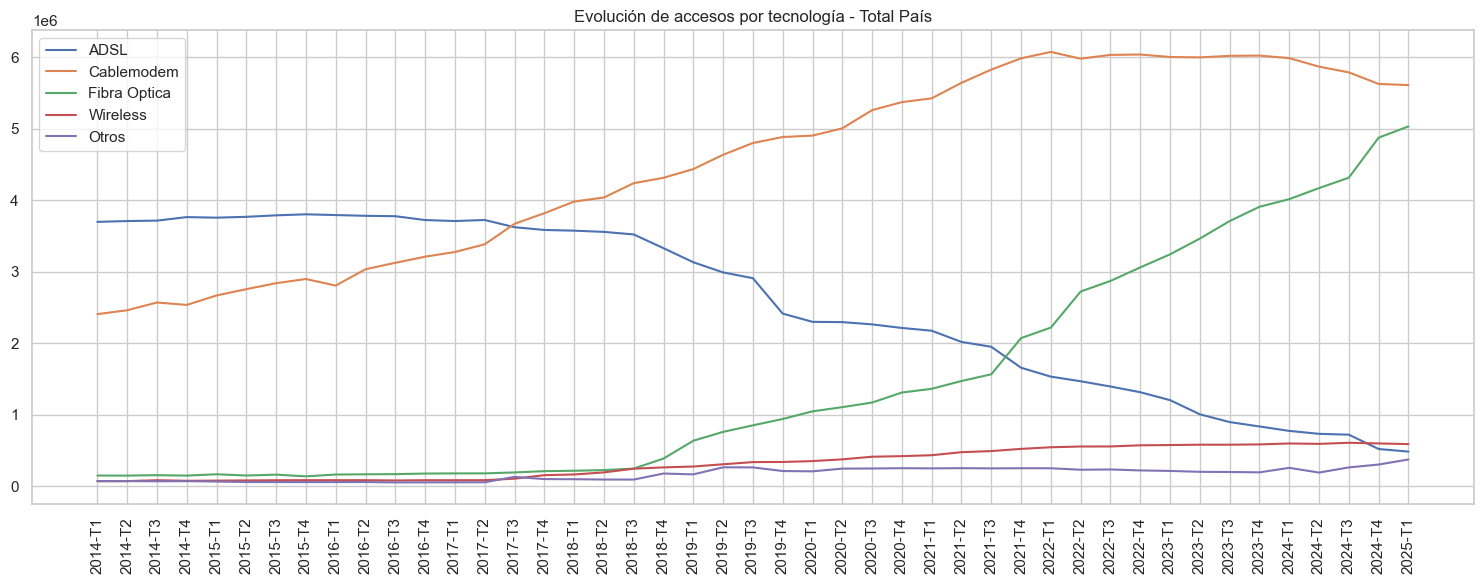

In [43]:
tot_orden = tot.sort_values(["Año","Trimestre"])
cols_tec = ["ADSL","Cablemodem","Fibra Optica","Wireless","Otros"]

plt.figure(figsize=(15,6))
for c in cols_tec:
    plt.plot(tot_orden["Periodo"], tot_orden[c], label=c)

plt.xticks(rotation=90)
plt.title("Evolución de accesos por tecnología - Total País")
plt.legend()
plt.tight_layout()
plt.show()


8. RANKING POR PROVINCIA (último período)

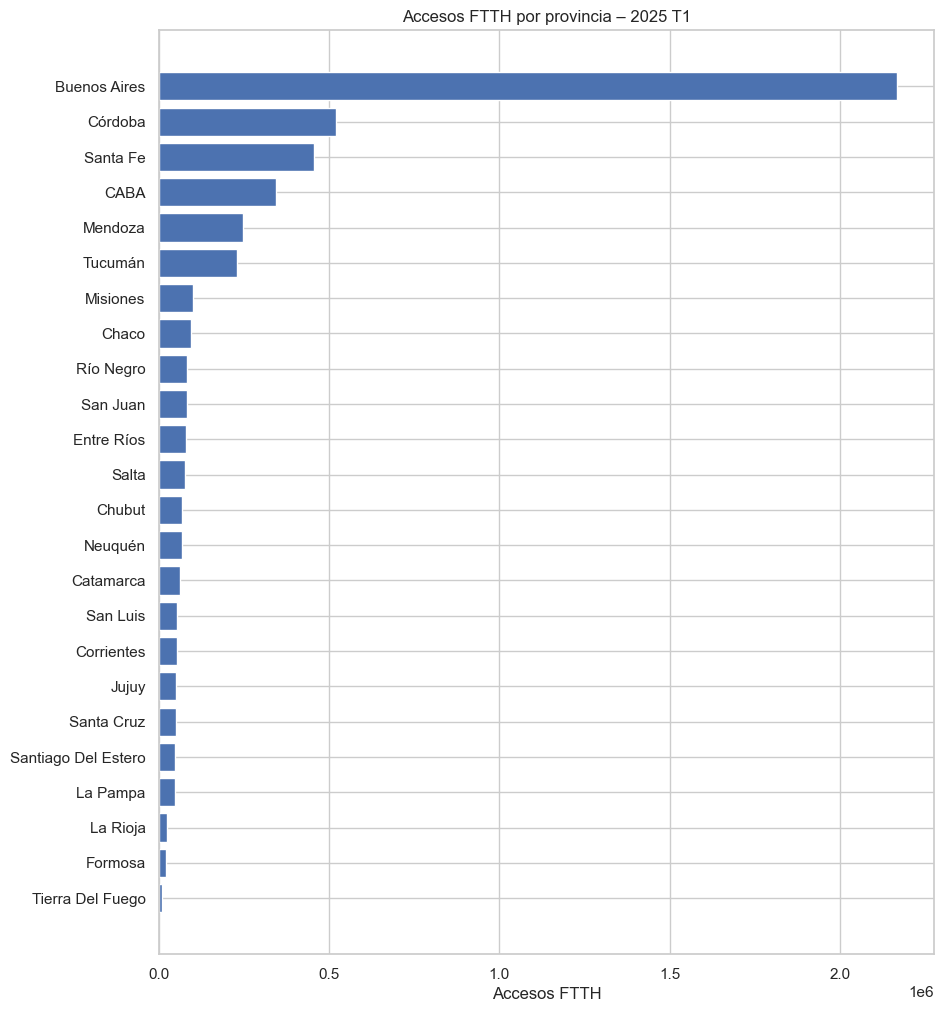

In [45]:
ultimo_anio = prov["Año"].max()
ultimo_trim = prov[prov["Año"] == ultimo_anio]["Trimestre"].max()

df_last = prov[(prov["Año"] == ultimo_anio) & (prov["Trimestre"] == ultimo_trim)]

top_fibra = df_last.sort_values("Fibra Optica", ascending=False)

plt.figure(figsize=(10,12))
plt.barh(top_fibra["Provincia"], top_fibra["Fibra Optica"])
plt.gca().invert_yaxis()
plt.title(f"Accesos FTTH por provincia – {ultimo_anio} T{ultimo_trim}")
plt.xlabel("Accesos FTTH")
plt.show()


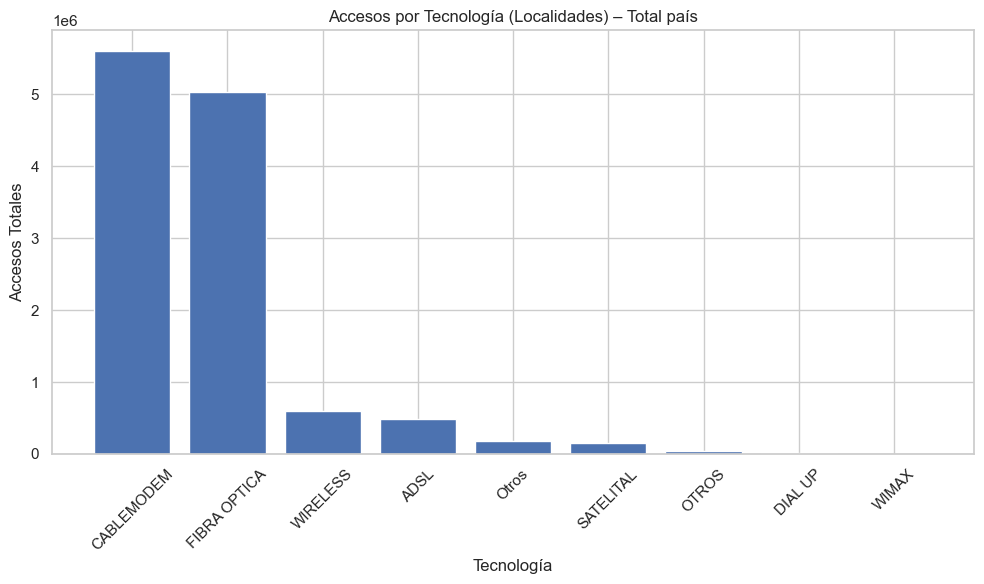

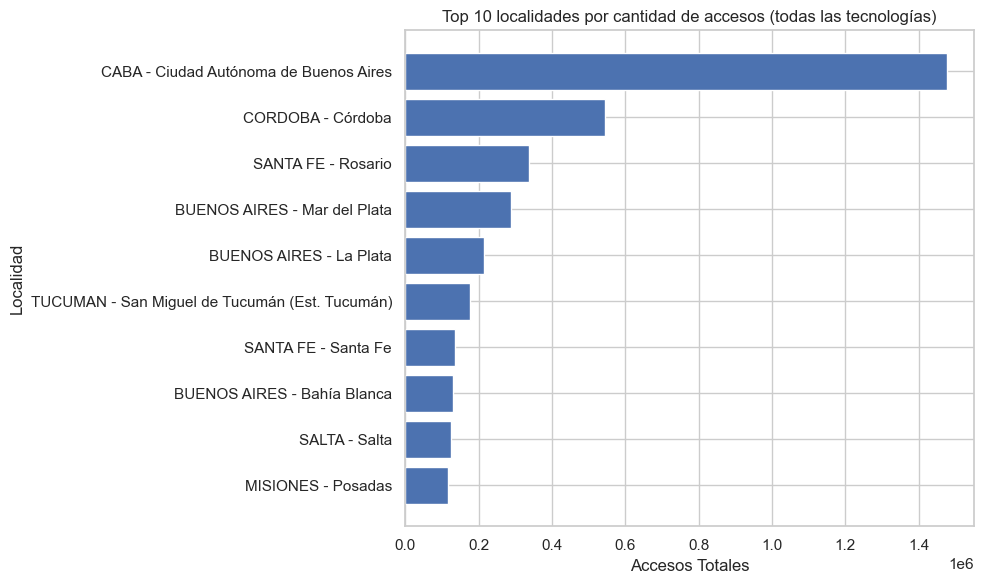

In [ ]:
# GRÁFICO 1: Accesos por tecnología (todas las localidades)
acc_por_tec = (
    loc.groupby("Tecnologia")["Accesos"]
    .sum()
    .sort_values(ascending=False))
plt.figure(figsize=(10,6))
plt.bar(acc_por_tec.index, acc_por_tec.values)
plt.xticks(rotation=45)
plt.title("Accesos por Tecnología (Localidades) – Total país")
plt.ylabel("Accesos Totales")
plt.xlabel("Tecnología")
plt.tight_layout()
plt.show()
# GRÁFICO 2: Top 10 localidades por cantidad de accesos (todas tecnologías)
# Agrupamos por Localidad (podés sumar también por Provincia si querés)
top10_loc = (
    loc.groupby(["Provincia", "Localidad"], as_index=False)["Accesos"]
    .sum()
    .sort_values("Accesos", ascending=False)
    .head(10))
# Creamos una etiqueta Provincia - Localidad para el eje Y
top10_loc["Etiqueta"] = top10_loc["Provincia"] + " - " + top10_loc["Localidad"]
plt.figure(figsize=(10,6))
plt.barh(top10_loc["Etiqueta"], top10_loc["Accesos"])
plt.gca().invert_yaxis()  # para que la localidad con más accesos quede arriba
plt.title("Top 10 localidades por cantidad de accesos (todas las tecnologías)")
plt.xlabel("Accesos Totales")
plt.ylabel("Localidad")
plt.tight_layout()
plt.show()

9. EXPORTAR LOS ARCHIVOS LIMPIOS PARA EXCEL

In [47]:
def decimales_a_coma(df):
    df2 = df.copy()
    for col in df2.columns:
        if df2[col].dtype in ['float64', 'float32']:
            df2[col] = df2[col].apply(lambda x: str(x).replace('.', ','))
    return df2


In [48]:
tot_clean  = decimales_a_coma(tot)
prov_clean = decimales_a_coma(prov)
loc_clean  = decimales_a_coma(loc)


In [49]:
tot_clean.to_csv('Internet_Accesos_Tecnologias_TOT_CLEAN.csv',
                 sep=';', index=False, encoding='utf-8')

prov_clean.to_csv('Internet_Accesos_Tecnologias_PROV_CLEAN.csv',
                  sep=';', index=False, encoding='utf-8')

loc_clean.to_csv('Internet_Accesos_Tecnologias_LOC_CLEAN.csv',
                 sep=';', index=False, encoding='utf-8')

print("Archivos exportados correctamente para Excel.")


Archivos exportados correctamente para Excel.
